97/97 [==============================] - 1s 3ms/step
Mean Squared Error: 0.2741633459633679
R-squared: 0.7926634006935571


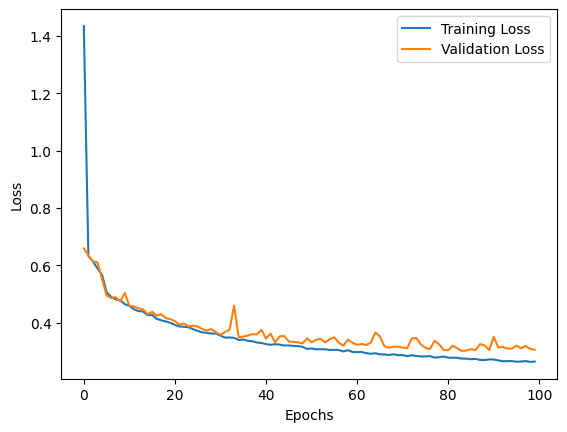

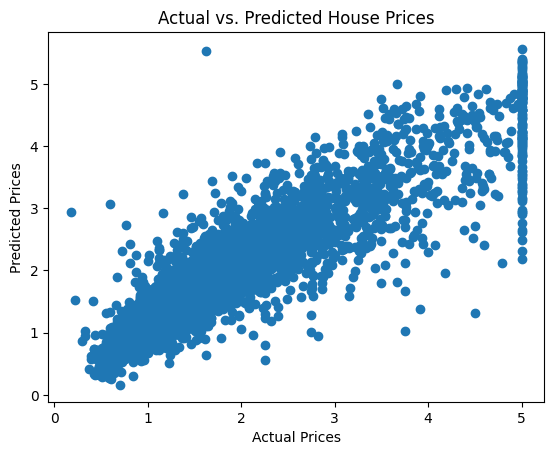

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow import keras

# Load the California Housing Prices dataset
data = fetch_california_housing()
X = data.data
y = data.target

# Split the dataset into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Reshape features for use in an RNN
X_train_rnn = X_train.reshape(-1, X_train.shape[1], 1)
X_val_rnn = X_val.reshape(-1, X_val.shape[1], 1)
X_test_rnn = X_test.reshape(-1, X_test.shape[1], 1)

# Build and compile the RNN model
model = keras.Sequential([
    keras.layers.LSTM(64, activation='relu', input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])),
    keras.layers.Dense(1)  # Output layer for regression
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the RNN model
history = model.fit(X_train_rnn, y_train, epochs=100, validation_data=(X_val_rnn, y_val), verbose=0)

# Evaluate the RNN model on the test set
y_pred = model.predict(X_test_rnn)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}\n")

# Visualize training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Visualize predicted vs. actual house prices
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted House Prices')
plt.show()
